# Neural Network to Predict House Prices

In this notebook, I create a simple CNN to predict whether the house price is below or above median value. 

The dataset used can be found [here](https://drive.google.com/file/d/1GfvKA0qznNVknghV4botnNxyH-KvODOC/view), and the tutorial that I followed is: https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4

# Exploring and Processing the Data

In [1]:
import pandas as pd

In [2]:
# read in the csv file
df = pd.read_csv('housepricedata.csv')

In [3]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [4]:
# convert pandas dataframe into an array by accessing its values
dataset = df.values

In [5]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [6]:
# split dataset into our input features & the label to predict
X = dataset[:,0:10]
Y = dataset[:,10]

Normalizing our data is very important, as we want the input features to be on the same order of magnitude to make our training easier. 

In [7]:
from sklearn import preprocessing

In [8]:
# scale our data to be between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [9]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

Set aside some parts of our dataset for a validation set and a test set.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [12]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [13]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


# Building and Training Our Neural Network

In [14]:
from keras.models import Sequential
from keras.layers import Dense

We will be using the Sequential model, which means that we merely need to describe the layers above in sequence. Our neural network has three layers:

- Hidden layer 1: 30 neurons, ReLU activation
- Hidden layer 2: 30 neurons, ReLU activation
- Output Layer: 1 neuron, Sigmoid activation

In [15]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Now that we've got our architecture specified, we need to configure the model before we start training by:
- Telling it what algorithm you want to use to do the optimization (we'll use stochastic gradient descent)
- Telling it what loss function to use (for binary classification, we will use binary cross entropy)
- Telling it what other metrics you want to track apart from the loss function (we want to track accuracy as well)

In [16]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
# specify the data we are training on, size of mini-batch, and how long to train for (epochs)
# also specify what our validation data is so that the model will tell us how we are doing on the validation data at each point

hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 17ms/step - loss: 0.6881 - accuracy: 0.6482 - val_loss: 0.6773 - val_accuracy: 0.7489
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6772 - accuracy: 0.7002 - val_loss: 0.6672 - val_accuracy: 0.7169
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.6870 - val_loss: 0.6590 - val_accuracy: 0.7215
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6609 - accuracy: 0.7076 - val_loss: 0.6513 - val_accuracy: 0.7352
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6561 - accuracy: 0.7048 - val_loss: 0.6442 - val_accuracy: 0.7534
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6537 - accuracy: 0.7155 - val_loss: 0.6376 - val_accuracy: 0.7580
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6445 - accuracy: 0.7449 - val_loss: 0.6313 - val_accuracy: 0.7763
Epoch 8/100


In [18]:
# Now, we evaluate our data on the test set
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2879 - accuracy: 0.8858


0.8858447670936584

# Visualizing Loss and Accuracy

In [19]:
import matplotlib.pyplot as plt

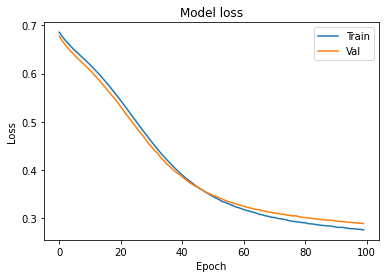

In [20]:
# Plot the training & validation loss

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

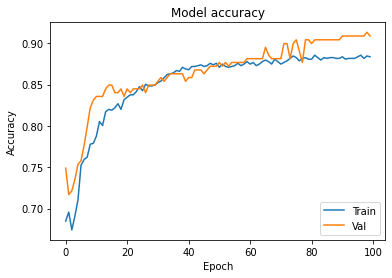

In [21]:
# Plot the training & validation accuracy

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Adding Regularization to our Neural Network

We'll train a model which will overfit (called Model 2).

In [22]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 46ms/step - loss: 0.5749 - accuracy: 0.6915 - val_loss: 0.3715 - val_accuracy: 0.8858
Epoch 2/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3512 - accuracy: 0.8517 - val_loss: 0.3146 - val_accuracy: 0.8721
Epoch 3/100
32/32 [==============================] - 1s 39ms/step - loss: 0.3098 - accuracy: 0.8716 - val_loss: 0.3022 - val_accuracy: 0.8950
Epoch 4/100
32/32 [==============================] - 1s 37ms/step - loss: 0.3114 - accuracy: 0.8686 - val_loss: 0.3017 - val_accuracy: 0.8950
Epoch 5/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2691 - accuracy: 0.8822 - val_loss: 0.3252 - val_accuracy: 0.8630
Epoch 6/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2766 - accuracy: 0.8643 - val_loss: 0.3122 - val_accuracy: 0.9178
Epoch 7/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2787 - accuracy: 0.8788 - val_loss: 0.3096 - val_accuracy: 0.8721
Epoch 

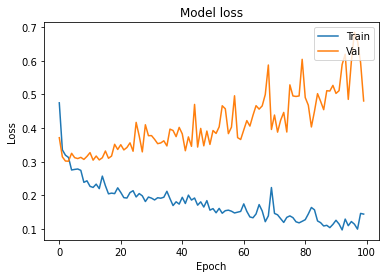

In [23]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

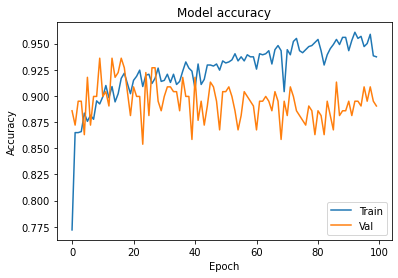

In [24]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

To address the overfitting we see in Model 2, we'll incorporate L2 regularization and dropout in our third model here (Model 3).

In [25]:
from keras.layers import Dropout
from keras import regularizers

In [26]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [27]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 54ms/step - loss: 21.1276 - accuracy: 0.5889 - val_loss: 3.8631 - val_accuracy: 0.8219
Epoch 2/100
32/32 [==============================] - 2s 48ms/step - loss: 2.4869 - accuracy: 0.8219 - val_loss: 0.7027 - val_accuracy: 0.8950
Epoch 3/100
32/32 [==============================] - 2s 49ms/step - loss: 0.6250 - accuracy: 0.8573 - val_loss: 0.5299 - val_accuracy: 0.8584
Epoch 4/100
32/32 [==============================] - 2s 48ms/step - loss: 0.5168 - accuracy: 0.8655 - val_loss: 0.4863 - val_accuracy: 0.9132
Epoch 5/100
32/32 [==============================] - 2s 48ms/step - loss: 0.5299 - accuracy: 0.8458 - val_loss: 0.4753 - val_accuracy: 0.9087
Epoch 6/100
32/32 [==============================] - 2s 48ms/step - loss: 0.4898 - accuracy: 0.8806 - val_loss: 0.4903 - val_accuracy: 0.8676
Epoch 7/100
32/32 [==============================] - 2s 49ms/step - loss: 0.4695 - accuracy: 0.8718 - val_loss: 0.4653 - val_accuracy: 0.9178
Epoch

For the Model 3 graphs, the loss is a lot higher at the start because we've changed our loss function. To plot such that the window is zoomed in between 0 and 1.2 for the loss, we add an additional line of code (plt.ylim) when plotting

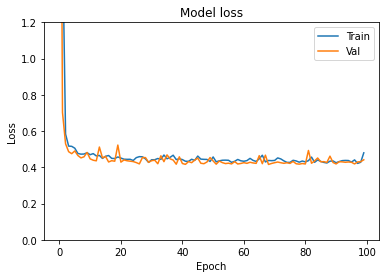

In [28]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

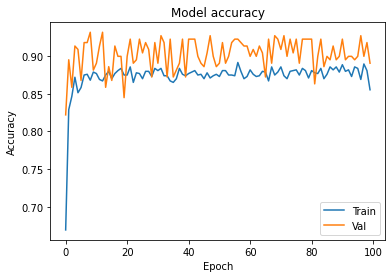

In [29]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

As compared to Model 2, there is less overfitting!

# Mean Squared Error Loss 

In [30]:
# same layers as original model
model_4 = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_4.compile(optimizer='sgd',

              loss='mean_squared_error',
              metrics=['accuracy'])

hist_4 = model_4.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.2561 - accuracy: 0.4862 - val_loss: 0.2532 - val_accuracy: 0.4703
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2518 - accuracy: 0.5114 - val_loss: 0.2499 - val_accuracy: 0.5616
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.5484 - val_loss: 0.2472 - val_accuracy: 0.6027
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2487 - accuracy: 0.6164 - val_loss: 0.2447 - val_accuracy: 0.6667
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2451 - accuracy: 0.6677 - val_loss: 0.2424 - val_accuracy: 0.7260
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2436 - accuracy: 0.6917 - val_loss: 0.2403 - val_accuracy: 0.7443
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2413 - accuracy: 0.7107 - val_loss: 0.2384 - val_accuracy: 0.7671
Epoch 8/100
3

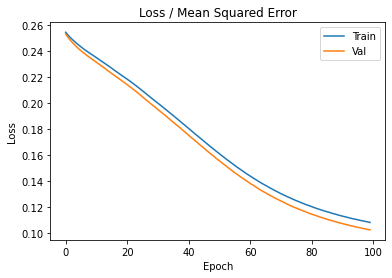

In [32]:
plt.plot(hist_4.history['loss'])
plt.plot(hist_4.history['val_loss'])
plt.title('Loss / Mean Squared Error')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()